# Excercise 2 Paul Hilt

## Import packages

In [2]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

import skimage.io
import skimage.color
import skimage.exposure

import time
import math
import random

## Task 1
(2 points)
1. Use $f = loss(100)$ which creates a 1D array that mimics a loss curve of some neural network.
2. Implement the naive $\mathcal{O}(n w)$ mean filter to smooth the loss.
3. Implement the improved $\mathcal{O}(n)$ mean filter to smooth the loss.
4. Show all three curves in a single plot with a legend.
5. Compare the runtime between the naive and improved implementation.

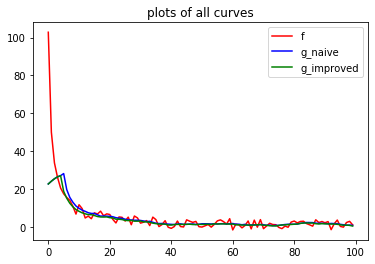

time for the naive method:  2.5658199787139893  ms
time for the improved method:  0.3715517520904541  ms


In [21]:
# 1.
def loss(n):    
    return 1.0 / (0.01 * (np.arange(0, n) + 1)) + 3.0 * np.random.uniform(-1.00, 1.00, n)

# TODO: generate f with loss helper function


# 2.
def naive_running_mean(f, w):
    '''
    Apply the naive running mean filter and return the smoothed values.

    f -- contains the values
    w -- window size
    '''
    # Assume zero padding
    g = np.zeros_like(f)
    complete_size = (2 * w + 1)
    for step in range(len(f)):
        window_sum = 0
        for el in range(max(0, step - w), min(len(f), step + w + 1)):
            window_sum += f[el]
        g[step] = window_sum / complete_size
    return g

# 3.
def improved_running_mean(f, w):
    '''
    Apply the improved running mean filter and return the smoothed values.

    f -- contains the values
    w -- window size
    '''
    # Assume zero padding
    g = np.zeros_like(f)
    f_sums = np.zeros_like(f)
    f_sums[0] = f[0]
    complete_size = (2 * w + 1)
    
    for i in range(1, len(f)):
        f_sums[i] = f[i] + f_sums[i-1]
        
    for i in range(len(f)):
        g[i] = (f_sums[min(i + w, len(f) - 1)] - f_sums[max(0, i - w)] * (i - w >= 0)) / complete_size
    
    return g

# 4.

# TODO: Plot all three curves in a single plot

n = 100
ws = 5
f = loss(n)

g_naive = naive_running_mean(f, ws)
g_improved = improved_running_mean(f, ws)

plt.plot(np.arange(n), f, 'r-', label="f")
plt.plot(np.arange(n), g_naive, 'b-', label="g_naive")
plt.plot(np.arange(n), g_improved , 'g-', label="g_improved")
plt.title('plots of all curves')
plt.legend()
plt.show()

# 5.

# TODO: Measure and print the runtime of both methods in Milliseconds

n = 100000
w = 50
f = loss(n)

method1_start = time.time()
_ = naive_running_mean(f, w)
method1_end = time.time()

method2_start = time.time()
_ = improved_running_mean(f, w)
method2_end = time.time()

print('time for the naive method: ', method1_end-method1_start, ' ms')
print('time for the improved method: ', method2_end-method2_start, ' ms')

## Task 2
(4 points)
1. Create numpy arrays for the horizontal and vertical Sobel kernel.
$$
S_x =\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

$$
S_y =\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

2. Implement the $\textit{convolve}$ function with four nested loops.
3. Load the image from the last exercise and detect its edges using the Sobel kernels and the $\textit{convolve}$ function.
4. Implement the 1D $\textit{convolve_fast}$ function. Apply the seperated Sobel operators $u$ and $v$. Plot the result together with $\textit{convolve(S_x)}$ and compare the runtime.
5. Implement a function that seperates a 2D kernel into 2 1D kernels.
6. (Bonus) Use the function for a gaussian blur kernel and apply it on the image.

In [22]:
# 1
# TODO Create S_x and S_y
S_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float)
S_y = S_x.T

print('Horizontal Sobel kernel:\n', S_x)
print('Vertical Sobel kernel:\n', S_y)

Horizontal Sobel kernel:
 [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]
Vertical Sobel kernel:
 [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


In [23]:
# 2
def convolve(arr, ker):
    '''
    Convolve the array using kernel K with four nested for loops.
    
    arr -- 2D array that gets convolved
    ker   -- kernel
    '''
    arr_conv = np.zeros_like(arr)
    w = ker.shape[0]//2
    padded_arr = np.pad(arr, w, 'constant', constant_values=0.0)
    
    for y_d in range(w, padded_arr.shape[0] - w):
        for x_d in range(w, padded_arr.shape[1] - w):
            window_sum = 0
            for y_k in range(-w, w + 1):
                for x_k in range(-w, w + 1):
                    window_sum += padded_arr[y_d-y_k, x_d-x_k] * ker[y_k + w, x_k + w]
            arr_conv[y_d-w, x_d-w] = window_sum
    
    return arr_conv

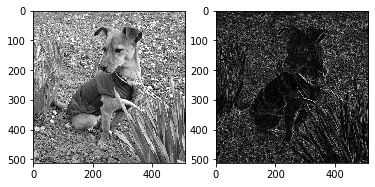

In [24]:
# 3
# TODO: load ./data/pepo.jpg as a grayscale image
image = skimage.io.imread("./data/pepo.jpg", as_gray=True)

# TODO: Use the Sobel filter for edge detection:
#       Compute the Gradient Magnitude using both Sobel kernels
edge_image_x = convolve(image, S_x)
edge_image_y = convolve(image, S_y)

edges = np.sqrt(edge_image_x**2 + edge_image_y**2)

# Show results
_, axis = plt.subplots(1, 2)
axis[0].imshow(image, cmap='gray')
axis[1].imshow(edges,cmap='gray')
plt.show()

u   =
 [[1]
 [2]
 [1]]
v   =
 [[-1  0  1]]
S_x =
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
the naive convolution had an overhead of:  3.6056790351867676  ms
the separated convolution had an overhead of:  2.4669742584228516  ms


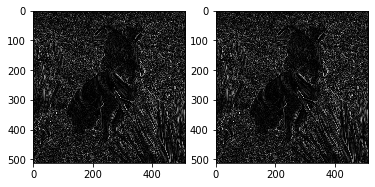

In [25]:
# 4
u = np.array([[1], [2], [1]])
v = np.array([[-1, 0, 1]])
S_x = np.dot(u, v)
print('u   =\n', u)
print('v   =\n', v)
print('S_x =\n', S_x)

def convolve_fast(arr, K_u, K_v):
    '''
    Convolve the array using kernel K_u and K_v.
    
    arr -- 2D array that gets convolved
    K_u -- kernel u
    K_v -- kernel v
    '''
    
        
    arr_conv1 = np.zeros_like(arr)
    g = np.zeros_like(arr)
    w = K_u.shape[0]//2
    padded_arr = np.pad(arr, 1, 'constant', constant_values=0.0)
    
    for y_d in range(w, padded_arr.shape[0] - w):
        for x_d in range(w, padded_arr.shape[1] - w):
            window_sum = 0
            for y_k in range(-w, w + 1):
                window_sum += padded_arr[y_d-y_k, x_d] * K_u[y_k+w, 0] 
            arr_conv1[y_d-w, x_d-w] = window_sum
    
    padded_arr = np.pad(arr_conv1, 1, 'constant', constant_values=0.0)
    
    for y_d in range(w, padded_arr.shape[0] - w):
        for x_d in range(w, padded_arr.shape[1] - w):
            window_sum = 0
            for x_k in range(-w, w + 1):
                window_sum += padded_arr[y_d, x_d-x_k] * K_v[0, x_k+w] 
            g[y_d-w, x_d-w] = window_sum

    return g

# TODO: Run both methods and compare their runtime
method1_start = time.time()
edge_image_x = convolve(image, S_x)
edge_image_y = convolve(image, S_y)
method1_end = time.time()

edges_naive = np.sqrt(edge_image_x**2 + edge_image_y**2)

method2_start = time.time()
edge_image_x_improved = convolve_fast(image, v.T, u.T)
edge_image_x_improved = convolve_fast(image, u, v)
method2_end = time.time()

edges_improved = np.sqrt(edge_image_x_improved**2 + edge_image_x_improved**2)

print('the naive convolution had an overhead of: ', method1_end-method1_start, ' ms')
print('the separated convolution had an overhead of: ', method2_end-method2_start, ' ms')


# Show results
_, axis = plt.subplots(1, 2)
axis[0].imshow(edges_naive, cmap='gray')
axis[1].imshow(edges_improved,cmap='gray')
plt.show()

In [26]:
# 5
print('rank of s_x:', np.linalg.matrix_rank(S_x))
print('rank of s_y:', np.linalg.matrix_rank(S_y))

def separate(K):
    '''
    Seperate the 2D kernel into 2 1D kernels.
    
    K -- 2D kernel
    '''
    U,Sigm,V = np.linalg.svd(K)
    
    K_u = U[:,0] * Sigm[0]
    K_v = V[:,0] * Sigm[0]
    
    return K_u, K_v

K_u, K_v = separate(S_x)
print('K_u =\n', K_u)
print('K_v =\n', K_v.T)
print('K   =\n', np.dot(K_u, K_v.T))

rank of s_x: 1
rank of s_y: 1
K_u =
 [-1.41421356 -2.82842712 -1.41421356]
K_v =
 [2.44948974 2.44948974 0.        ]
K   =
 -10.392304845413271


In [32]:
# # 6 Bonus
# def gaussian_kernel(kernel_size, sigma):
#     '''
#     Return a 2D gaussian kernel.
    
#     kernel_size -- size of the kernel
#     sigma       -- sigma of the gaussian blur
#     '''
   
#     return h

# K = gaussian_kernel(15, 15)

# K_u, K_v = separate(K)

# # TODO: Run both methods and compare their runtime

# # Plot the results
# _, axis = plt.subplots(1, 2)
# axis[0].imshow(conv_x_naive, cmap='gray')
# axis[1].imshow(conv_x_improved,cmap='gray')
# plt.show()

## Task 3
(4 points)

1. Implement the naive max function using nested loops.
2. Implement the $\mathcal{O}(n log w)$ faster max function using a binary tree.

In [34]:
#1
def naive_max(arr, w):
    '''
    Return the maximum-filtered array
    
    arr -- 1D array
    ws -- window size
    '''
    g = np.zeros_like(arr)
    padded_arr = np.pad(arr, w, 'constant', constant_values=-np.inf)
    
    for x_d in range(w, padded_arr.shape[0] - w):
        window_max = -np.inf
        for x_k in range(-w, w + 1):
            val = padded_arr[x_d-x_k]
            if window_max < val:
                window_max = val
            g[x_d-w] = window_max
    
    return g

# Generate some random data to filter
f = []
for i in range(25):
    f.append(random.randint(0, 100))

print('input = ', f)
print('naive_max =', naive_max(f, 3))

input =  [75, 13, 70, 68, 68, 54, 77, 32, 88, 61, 58, 72, 45, 34, 24, 62, 94, 58, 82, 89, 42, 74, 59, 47, 39]
naive_max = [75 75 75 77 77 88 88 88 88 88 88 88 72 94 94 94 94 94 94 94 89 89 89 74
 74]


In [37]:
#2
class Node:
    def __init__(self):
        self.max = -np.inf # value of this node
        self.top = None    # reference to parent node
        self.left = None   # left child node
        self.right = None  # right child node
        
        # HINT: this list will hold a reference to all leaf nodes that
        #       are children of this node.
        #       You will need later to add new and replace old values
        #       in the tree.
        self.elems = []    # list of all child leaf nodes
    
    
    def build_tree(self, depth, top=None):
        '''
        Build up a tree of certain depth
        
        depth -- tree depth
        top -- parent node
        '''
        self.top = top
        
        if depth > 0:
            depth -= 1
            # TODO: recursively initialize all children         
            self.left = Node()
            self.right = Node()
            
            self.left.top = self
            self.right.top = self
            
            elems_left = self.left.build_tree(depth, self)
            elems_right = self.right.build_tree(depth, self)
            
            # TODO: concatenate elems lists of children
            # HINT: nodes that are not leafes should not be added
            #       to self.elems
            self.elems += elems_left
            self.elems += elems_right
            
        
        else:
            # TODO: this is a leaf node
            # HINT: this node has to be added to the elems list
            self.elems.append(self)
            
        
        return self.elems
    
    
    def update(self):
        '''
        Update the value (self.max) of this node
        and its parent nodes recursively
        '''
        self.max = max(self.left.max, self.right.max)
        
        if self.top != None:
            self.top.update()


class MaxTree:
    def __init__(self, ws):
        '''
        ws -- window size
        '''
        # TODO: compute number of leafes and tree depth (length = 2 * ws + 1)
        self.length = 2 * ws + 1
        self.depth = int(np.ceil(np.log2(self.length)))  # formula for depth of a binary treee
        
        # TODO: initialize root node 
        self.root = Node()
        
        # init pointer to next element to be replaced
        self.ptr = 0
        
    def replace_elem(self, value):
        '''
        Replace an element (value of leaf node) in the tree

        value -- value of new element
        '''
        # HINT: use self.ptr as a pointer to the next
        #       element that has to be replaced
        
        self.root.elems[self.ptr].max = value
        
        self.ptr += 1
        self.ptr %= self.length

    
    def get_max(self):
        return self.root.max


def fast_max(arr, ws):
    '''
    Return the maximum-filtered array
    
    arr -- 2D array
    ws -- window size
    '''
    # test function in the next cell expects ndarray
    max_arr = np.zeros_like(arr)
#     max_arr = []
    
    # TODO: initialize tree
    tree = MaxTree(ws)
    elems = tree.root.build_tree(tree.depth)
    arr_pad = np.pad(arr, ws, 'constant', constant_values=-np.inf)
    
    for i in range(tree.length):
        tree.replace_elem(arr_pad[i])
    
    for i in range(tree.length):
        elems[i].top.update()
    
    
    # TODO: compute maximum-filtered output array
    
    for i in range(ws, len(arr) + ws - 1):
        max_arr[i - ws] = tree.get_max()
        n_ptr = tree.ptr
        tree.replace_elem(arr_pad[i + ws + 1])
        elems[n_ptr].top.update()
    
    return max_arr


print('input = ', f)
print('fast_max =', fast_max(f, 3))

input =  [75, 13, 70, 68, 68, 54, 77, 32, 88, 61, 58, 72, 45, 34, 24, 62, 94, 58, 82, 89, 42, 74, 59, 47, 39]
fast_max = [75 75 75 77 77 88 88 88 88 88 88 88 72 94 94 94 94 94 94 94 89 89 89 74
  0]


We now use your implementation to filter an image with different window sizes.
Note, that for small windows, the naive method is indeed faster due to the lower overhead.
However, as it has a much better time complexity, the tree method is much faster for large windows.


Filter with window size 2
Naive implementation took 950.888 ms
Improved implementation took 1334.631 ms


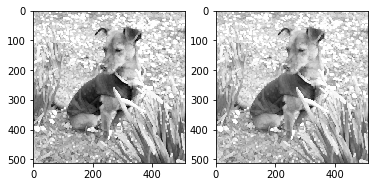


Filter with window size 4
Naive implementation took 1595.716 ms
Improved implementation took 1482.120 ms


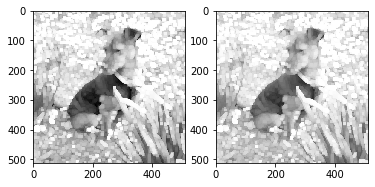


Filter with window size 8
Naive implementation took 2697.514 ms
Improved implementation took 1782.393 ms


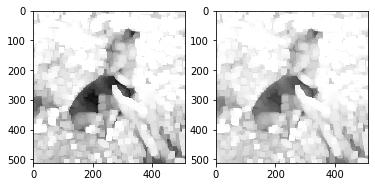


Filter with window size 16
Naive implementation took 4908.319 ms
Improved implementation took 2181.363 ms


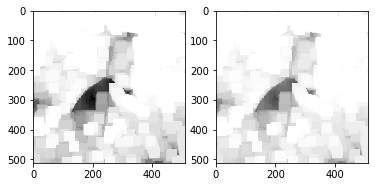


Filter with window size 32
Naive implementation took 9598.888 ms
Improved implementation took 3146.997 ms


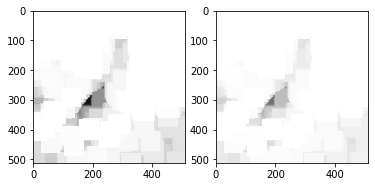

In [38]:
# Nothing to do here ;)
def image_max(arr, ws, method):
    '''
    Apply a max-filter to an image
    
    arr -- input image
    ws -- window size
    method -- filter function
    '''
    out = np.zeros_like(arr)
    
    for y in range(arr.shape[0]):
        out[y] = method(arr[y], ws)
    
    for x in range(arr.shape[1]):
        out[:, x] = method(out[:, x], ws)
    
    
    return out

for ws in [2, 4, 8, 16, 32]:
    print('\nFilter with window size {}'.format(ws))
    start_time = time.time()
    max_img_naive = image_max(image, ws, naive_max)
    naive_time = time.time() - start_time
    print('Naive implementation took {:.3f} ms'.format(1000 * naive_time))

    start_time = time.time()
    max_img_improved = image_max(image, ws, fast_max)
    improved_time = time.time() - start_time
    print('Improved implementation took {:.3f} ms'.format(1000 * improved_time))

    _, axis = plt.subplots(1, 2)
    axis[0].imshow(max_img_naive, cmap='gray')
    axis[1].imshow(max_img_improved,cmap='gray')
    plt.show()